#Predicting Air Quality Index(AQI) with the help of PM2.5

In [1]:
#importing necessary libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
import numpy as np

In [2]:
#Acessing google drive from google colab
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
# Loading the dataset from drive
df = pd.read_csv('/content/drive/MyDrive/Dissertation/clean_data.csv')

In [4]:
#showing the first few data from the dataset
df.head(5)

,pubtime,PM2.5,PM10,NO2,O3,CO,SO2,AQI
0,2020-06-30 00:00:00,11.0,23.0,26.0,70.0,0.7,5.0,23.0
1,2020-06-30 01:00:00,14.0,23.0,29.0,54.0,0.8,5.0,23.0
2,2020-06-30 02:00:00,11.0,23.0,31.0,48.0,0.7,5.0,23.0
3,2020-06-30 03:00:00,12.0,25.0,42.0,26.0,0.7,5.0,25.0
4,2020-06-30 04:00:00,7.0,29.0,36.0,22.0,0.7,5.0,29.0


In [5]:
df.shape

(4417, 8)

#Linear Regression Model

In [6]:
#dropping all column except feature column PM2.5 and store in x
x= df.drop(columns = ['pubtime','AQI','PM10','NO2','O3','CO','SO2'])
x

,PM2.5
0,11.0
1,14.0
2,11.0
3,12.0
4,7.0
...,...
4412,21.0
4413,22.0
4414,26.0
4415,24.0


In [7]:
#storing target column in y
y = df['AQI']
y

0       23.0
1       23.0
2       23.0
3       25.0
4       29.0
        ... 
4412    55.0
4413    58.0
4414    57.0
4415    54.0
4416    56.0
Name: AQI, Length: 4417, dtype: float64

In [8]:
#splitting test train data by using train_test_split libraries from sklearn
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2,random_state=0)


In [9]:
#fitting the model
lr= LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [10]:
#calculating intercept c
c = lr.intercept_
c

26.340297259337067

In [11]:
# Calculating coefficient m
m = lr.coef_
m

array([1.04081298])

In [12]:
#predicting y training values
y_pred_train = lr.predict(x_train)
y_pred_train

array([ 70.05444242, 131.46240825,  98.15639289, ...,  54.44224772,
        28.42192322,  69.01362944])

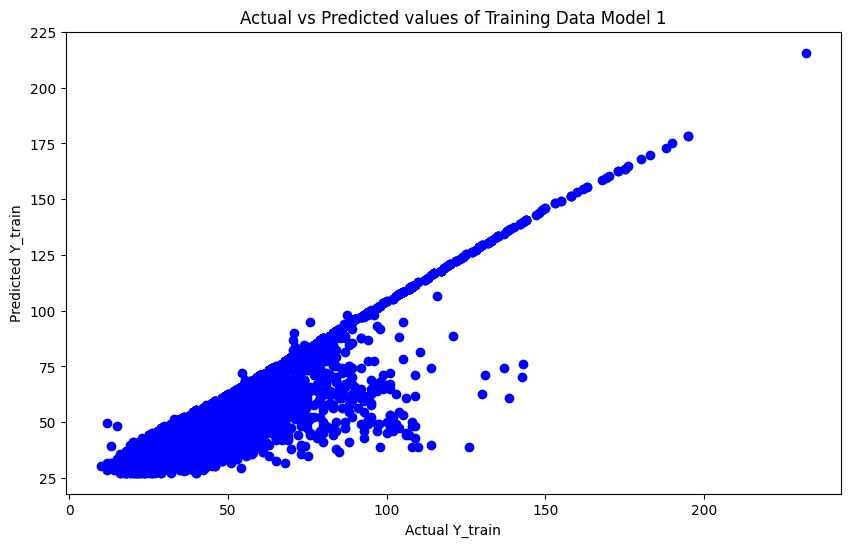

In [13]:
# Plotting Training Actual values vs Predicted Values
plt.figure(figsize=(10, 6))
# Scatter plot of training data (actual values)
plt.scatter(y_train, y_pred_train, color='blue')
# Labels
plt.xlabel('Actual Y_train')
plt.ylabel('Predicted Y_train')
plt.title('Actual vs Predicted values of Training Data Model 1')
# Display the plot
plt.show()




In [14]:
#Prdicitng y testing values
y_pred_test = lr.predict(x_test)
y_pred_test

array([ 45.0749309 ,  32.58517514,  41.95249196,  55.4830607 ,
        72.13606839,  39.870866  ,  30.50354918,  37.78924004,
        65.8911905 ,  51.31980878,  32.58517514,  47.15655686,
        34.6668011 ,  34.6668011 ,  74.21769435, 107.52370971,
       115.85021355,  31.54436216,  45.0749309 ,  51.31980878,
        65.8911905 , 134.58484719,  52.36062176,  59.64631262,
        48.19736984,  47.67696335,  60.6871256 ,  36.74842706,
        55.4830607 ,  41.95249196,  55.4830607 , 123.13590441,
        55.4830607 ,  97.11557991,  71.0952554 ,  33.62598812,
        51.31980878,  31.54436216, 109.60533567,  49.23818282,
        44.03411792,  71.0952554 ,  49.23818282, 105.44208375,
        31.54436216,  35.70761408,  32.58517514,  38.83005302,
        38.83005302,  91.91151501,  47.15655686,  53.40143474,
        32.58517514, 112.72777461,  45.0749309 ,  58.60549964,
        66.93200348,  34.6668011 ,  53.40143474,  30.50354918,
        38.83005302,  56.52387368,  34.6668011 ,  31.54

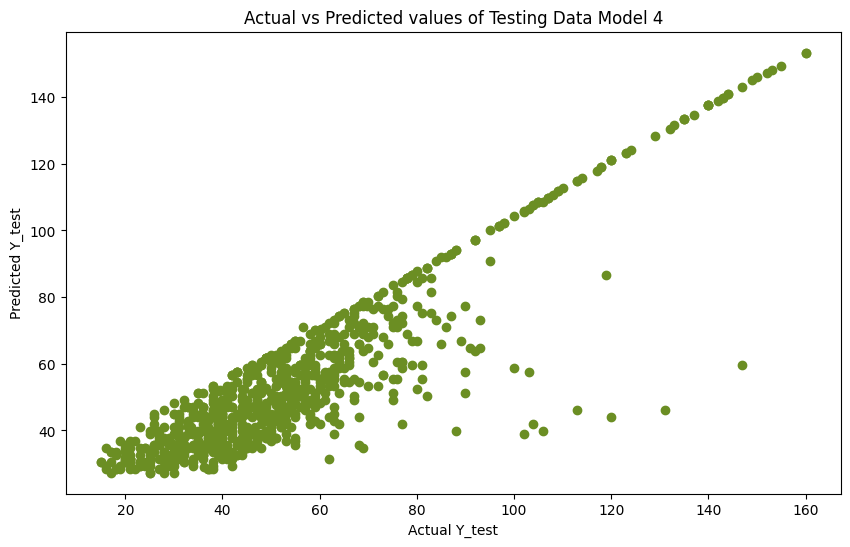

In [15]:
#Plotting  Testing Actual values vs Predicted Vlaues
plt.figure(figsize=(10, 6))
# Scatter plot of testing data
plt.scatter(y_test, y_pred_test, color ='olivedrab')
# Labels
plt.xlabel('Actual Y_test')
plt.ylabel('Predicted Y_test')
plt.title('Actual vs Predicted values of Testing Data Model 4')
# Display the plot
plt.show()


In [16]:
#Calculating training data error term for linear regression
res_train = (y_train - y_pred_train)
res_train

4339    72.695558
4275     1.537592
3849    -5.156393
883     -4.115744
134     -5.503549
          ...    
1033    -7.156557
3264     9.965882
1653    -2.442248
2607    -9.421923
2732   -11.013629
Name: AQI, Length: 3533, dtype: float64

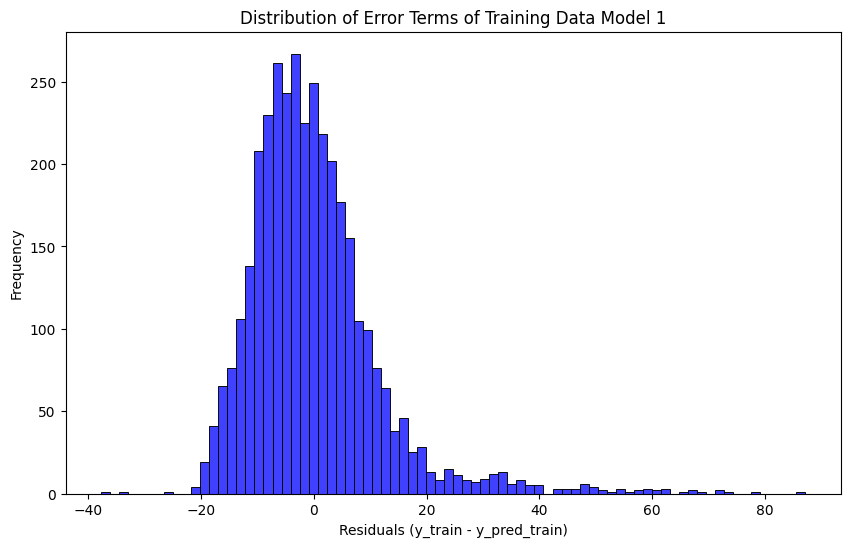

In [17]:
# Plotting histogram to show the error terms for trainig data
plt.figure(figsize=(10, 6))
# Creating the histogram plot using Seaborn
sns.histplot(res_train , color = 'blue')

# Label the plot
plt.title('Distribution of Error Terms of Training Data Model 1')
plt.xlabel('Residuals (y_train - y_pred_train)')
plt.ylabel('Frequency')
plt.show()

In [18]:
#Calculating testing data error term for linear regression
res_test = (y_test - y_pred_test)
res_test

2917    -7.074931
1457    -3.585175
1669    62.047508
2013    -2.483061
4303     2.863932
          ...    
2527    -3.095255
2339     1.496451
3276    10.006695
3354     1.435313
3019    -3.095255
Name: AQI, Length: 884, dtype: float64

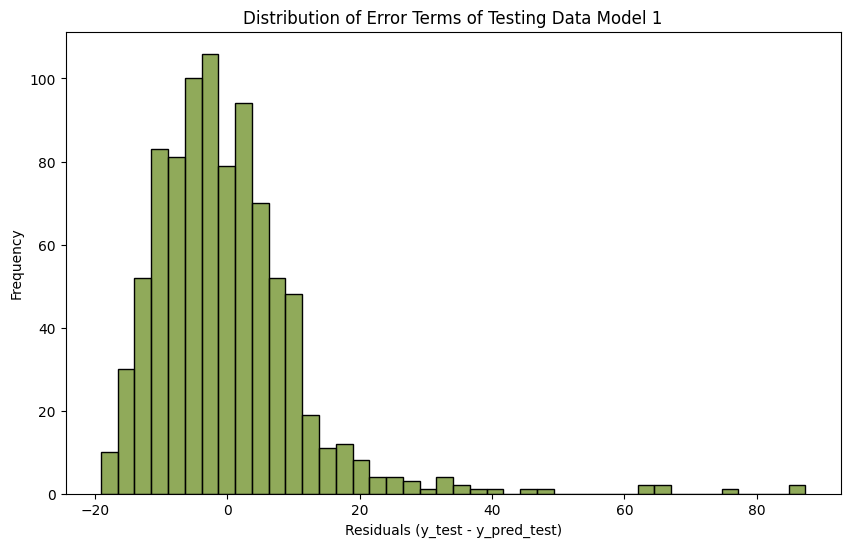

In [19]:
# Plotting histogram to show the error terms for testing data
plt.figure(figsize=(10, 6))
# Creating the histogram plot using Seaborn
sns.histplot(res_test , color ='olivedrab')

# Label the plot
plt.title('Distribution of Error Terms of Testing Data Model 1')
plt.xlabel('Residuals (y_test - y_pred_test)')
plt.ylabel('Frequency')
plt.show()

Evaluation of Linear Regression

#Training Data

In [20]:
#Calculating Mean Squared Error of Training Data
mse = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error (MSE) of Training Data:", mse)

Mean Squared Error (MSE) of Training Data: 137.09214220703785


In [21]:
#calculating Root Mean Squared Error of Training Data
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE) of Training Data:", rmse)

Root Mean Squared Error (RMSE) of Training Data: 11.708635369121282


In [22]:
#Calculating Mean Absolute Error of Training Data
mae = mean_absolute_error(y_train, y_pred_train)
print("Mean Absolute Error (MAE) of Training Data:", mae)

Mean Absolute Error (MAE) of Training Data: 8.180846600040727


In [23]:
#Calculating R-Squared of Training Data
rsquare =  r2_score(y_train, y_pred_train)
print("R-sqaured of Training Data:", rsquare)

R-sqaured of Training Data: 0.7959447841318095


###Testing Data

In [24]:
#Calculating Mean Squared Error
mse = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error (MSE) of Testing Data :", mse)

Mean Squared Error (MSE) of Testing Data : 132.2206699408324


In [25]:
#calculating Root Mean Squared Error
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE) of Testing Data:", rmse)

Root Mean Squared Error (RMSE) of Testing Data: 11.498724709324613


In [26]:
#Calculating Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred_test)
print("Mean Absolute Error (MAE) of Testing Data:", mae)

Mean Absolute Error (MAE) of Testing Data: 7.900466019689688


In [27]:
#Calculating R-Squared  of Testing Data
rsquare =  r2_score(y_test, y_pred_test)
print("R-sqaured of Testing Data:", rsquare)

R-sqaured of Testing Data: 0.799659153879728
